In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gp
import folium

In [2]:
df = pd.read_csv('./datasets/cleaned_pirate_activity_eda.csv', index_col = 0)

In [4]:
m = folium.Map()
df.apply(lambda x: folium.CircleMarker(location = (x['Y'], x['X']), radius = 1).add_to(m), axis = 1)
m

**Distribution of pirate encounters**

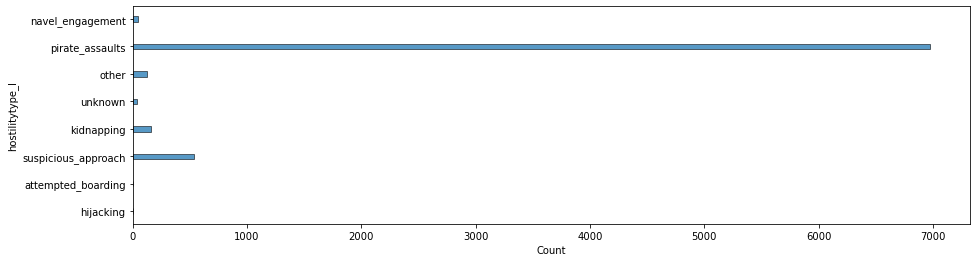

In [5]:
plt.figure(figsize = (15,4))
sns.histplot(data = df, y = 'hostilitytype_l', shrink = .2);

**Pirate attacks by year**

<Figure size 1800x360 with 0 Axes>

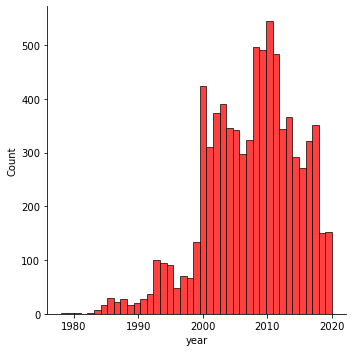

In [6]:
plt.figure(figsize = (25,5))
sns.displot(data = df, x = 'year',color = 'red', bins = len(df['year'].value_counts()));

There is a huge spike in attacks as we move in the 2000's with an even larger increase in the early 2010's. 

In [8]:
df.hostilitytype_l.value_counts()

pirate_assaults        6971
suspicious_approach     537
kidnapping              163
other                   124
navel_engagement         47
unknown                  40
attempted_boarding        6
hijacking                 1
Name: hostilitytype_l, dtype: int64

# go back to cleaning notebook and remove og subreg column

![Subregions]('./img/Subregions.png')

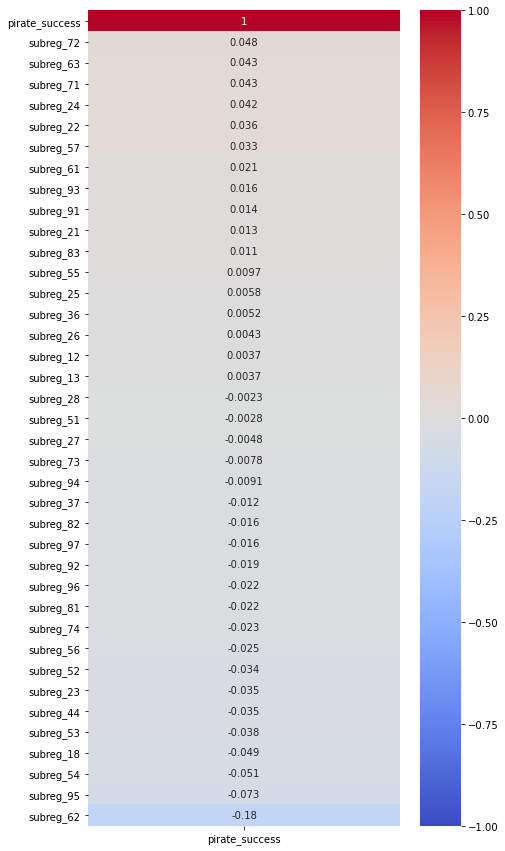

In [9]:
#Show which subregions pirates are most successfull in. 

sub_reg_cols = [x for x in df.columns if x[:6] in 'subreg' or x == 'pirate_success'][1:]

plt.figure(figsize=(7, 15))
sns.heatmap(df[sub_reg_cols].corr()[['pirate_success']][1:].sort_values('pirate_success', ascending = False),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1);

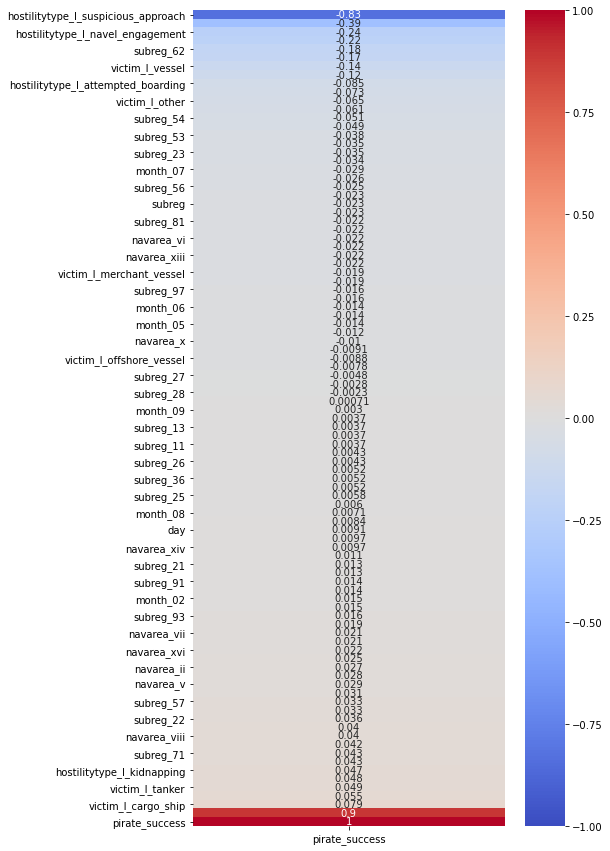

In [10]:
plt.figure(figsize=(7, 15))
sns.heatmap(df.corr()[['pirate_success']].sort_values('pirate_success'),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1);

# Months

**Pirate success by month**

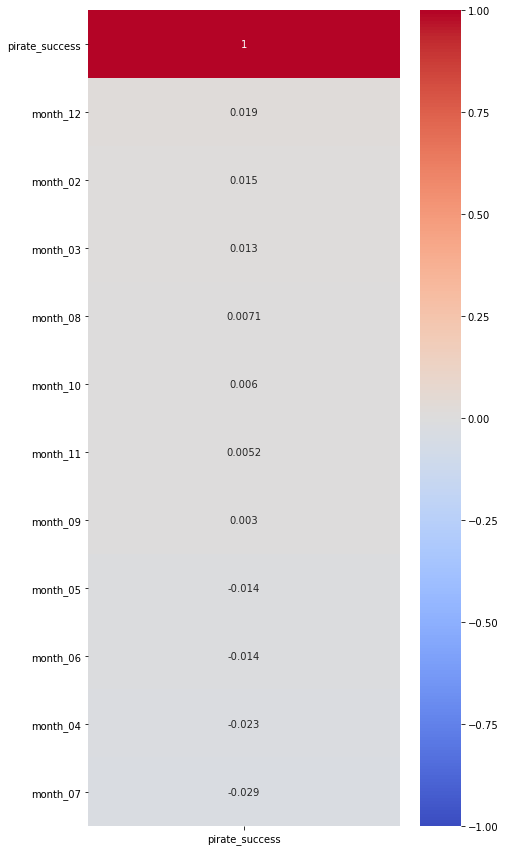

In [20]:
#Show which subregions pirates are most successfull in. 

month_cols = [x for x in df.columns if x[:5] in 'month' or x == 'pirate_success'][1:]

plt.figure(figsize=(7, 15))
sns.heatmap(df[month_cols].corr()[['pirate_success']][1:].sort_values('pirate_success', ascending = False),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1);

Out of all months pirates are having greater success in December February and March. The correlations are not too strong however so we're inclined to see what other factors contribute to pirate success.

**Distribution of pirate attacks by month**

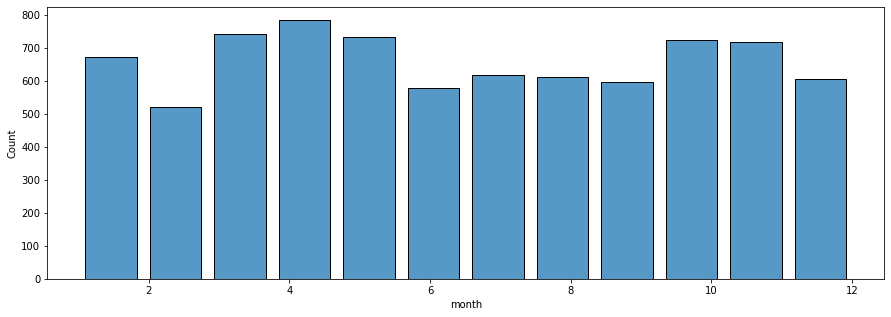

In [18]:
plt.figure(figsize = (15,5))
sns.histplot(data = df, x = 'month', shrink = .8, bins = 12);

Pirate attacks remain generally consistent across months. With an exception of Feburary other months don't show a vast difference. Our inital assumption when looking at the month of February is that since its the one month that has the least amount of days, this may equate to less travel or merchant activity which leads to lower opportunites of pirate attacks. 

**Victim types**

Distribution of victims:

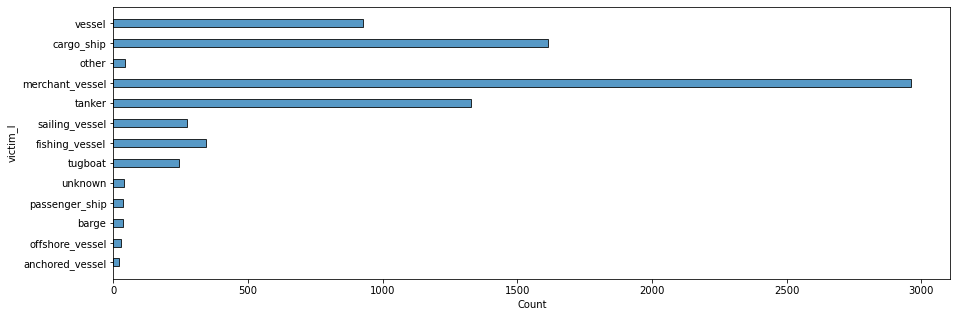

In [7]:
plt.figure(figsize = (15,5))
sns.histplot(data = df, y = 'victim_l', shrink = .4);

Pirate Success based on victim type:

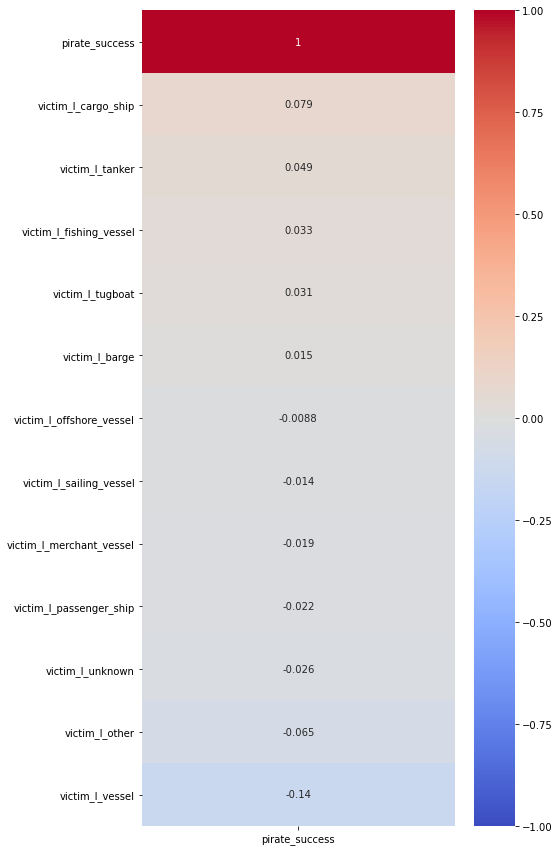

In [21]:
#Show which subregions pirates are most successfull in. 

victim_cols = [x for x in df.columns if x[:5] in 'victim_l' or x == 'pirate_success'][1:]

plt.figure(figsize=(7, 15))
sns.heatmap(df[victim_cols].corr()[['pirate_success']][1:].sort_values('pirate_success', ascending = False),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1);

Merchant vessels get attacked more than any other vessel by a wide margin. Cargo ships come in second. Both of these observations are not surprising given the profit to be gained. Attacks on sailing vessels, tugboats and tankers are interesting as they would seem to be less profitable endeavors. 

In [30]:
df.head(1)

X          Y reference  subreg    hostility_d        victim_d  \
0 -75.133333  21.933333    1990-9      26  cuban gunboat  belesbat queen   

                                         description   hostilitytype_l  \
0  a cuban gunboat commandeered luxury yacht bele...  navel_engagement   

  victim_l navarea  ... month_04 month_05  month_06  month_07  month_08  \
0   vessel      iv  ...        0        0         1         0         0   

   month_09  month_10  month_11  month_12  pirate_success  
0         0         0         0         0               0  

[1 rows x 104 columns]

In [ ]:
#Map showing areas where passenger_ship and sailing_vessel are getting hit.

In [31]:
m = folium.Map()
df[df['passenger_ship','sailing_vessel'] == 1].apply(lambda x: folium.CircleMarker(location = (x['Y'], x['X']), radius = 1).add_to(m), axis = 1)
m

KeyError: ('passenger_ship', 'sailing_vessel')

In [ ]:
#Distributions of attacks by navarea. Bring in navarea map screenshot